In [315]:
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

In [316]:
ROOT_DIR_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATASET_REL_PATH = "data/csv/CaliforniaHousing/cal_housing.csv"
DATASET_PATH = os.path.join(ROOT_DIR_PATH, DATASET_REL_PATH)

def load_housing_data(housing_path=DATASET_PATH):
    return pd.read_csv(housing_path)

In [341]:
def print_column_indices(X):
    column_names = ["Total_rooms", "Total_bedrooms", "Households", "Median_income", "Housing_median_age"]

    for column_name in column_names:
        column_index = X.columns.get_loc(column_name)
        print(f"The index of '{column_name}' column is: {column_index}")


In [317]:
housing_df = load_housing_data()

In [342]:
print_column_indices(housing_df)

The index of 'Total_rooms' column is: 3
The index of 'Total_bedrooms' column is: 4
The index of 'Households' column is: 6
The index of 'Median_income' column is: 7
The index of 'Housing_median_age' column is: 2


In [318]:
housing_df.describe()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [319]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Housing_median_age  20640 non-null  float64
 3   Total_rooms         20640 non-null  float64
 4   Total_bedrooms      20640 non-null  float64
 5   Population          20640 non-null  float64
 6   Households          20640 non-null  float64
 7   Median_income       20640 non-null  float64
 8   Median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Text(0.5, 1.0, 'Map of the houses and their prices')

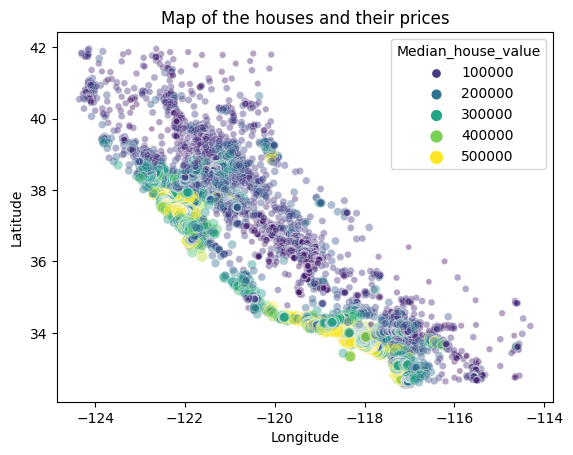

In [320]:
plt.clf()
sns.scatterplot(
    data=housing_df,
    x=housing_df.Longitude,
    y=housing_df.Latitude,
    size=housing_df.Median_house_value,
    hue=housing_df.Median_house_value,
    palette="viridis",
    alpha=0.4,
)
plt.title("Map of the houses and their prices")

<Figure size 640x480 with 0 Axes>

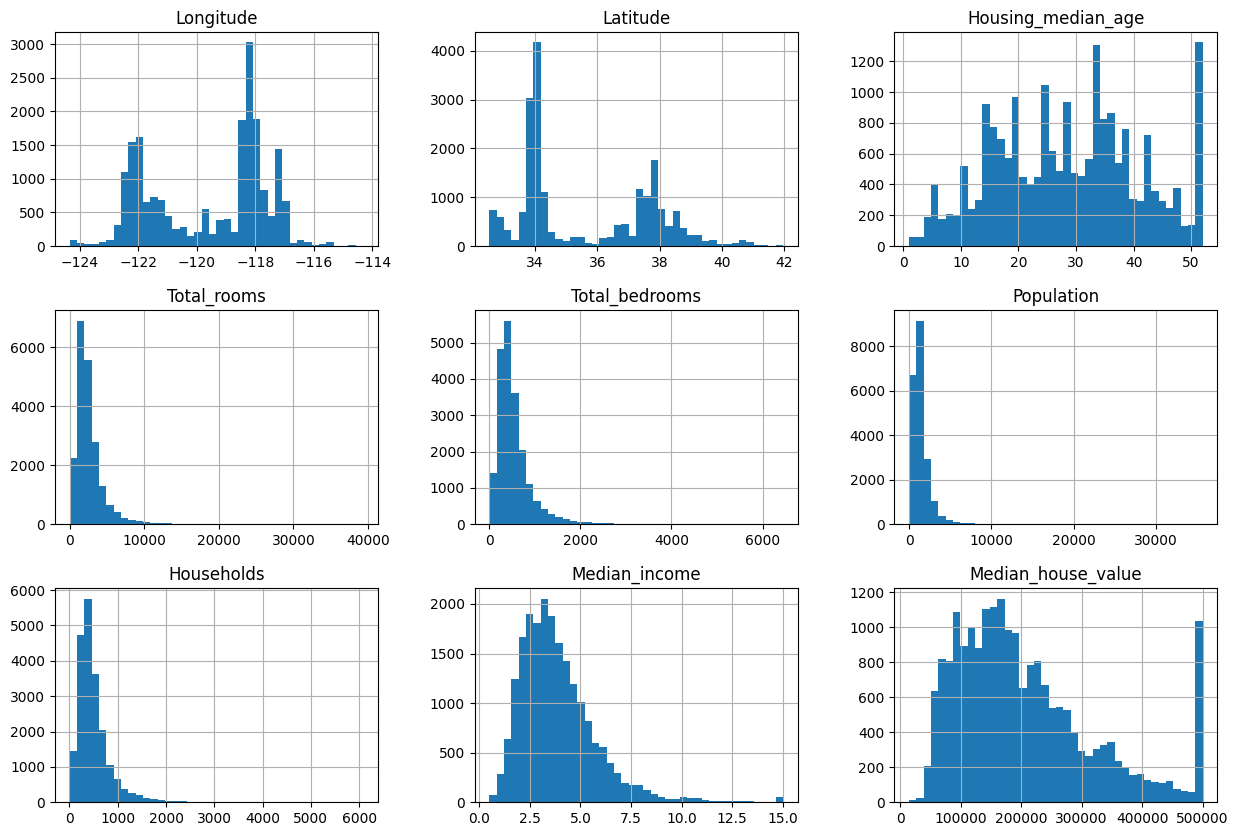

In [321]:
plt.clf()
housing_df.hist(bins=40, figsize=(15, 10))
plt.show()

### Correlation with the target variable

In [322]:
correlation_matrix = housing_df.corr()

In [323]:
correlation_matrix.Median_house_value.sort_values()

Latitude             -0.144160
Longitude            -0.045967
Population           -0.024650
Total_bedrooms        0.050594
Households            0.065843
Housing_median_age    0.105623
Total_rooms           0.134153
Median_income         0.688075
Median_house_value    1.000000
Name: Median_house_value, dtype: float64

### Feature engineering

In [324]:
housing_df_engineered_features = housing_df.copy()

In [325]:
housing_df_engineered_features["Total_rooms_per_Households"] = housing_df["Total_rooms"]/housing_df["Households"]
housing_df_engineered_features["Median_income_per_household"] = housing_df["Median_income"]/housing_df["Households"]
housing_df_engineered_features["Housing_median_age_per_Total_rooms"] = housing_df["Housing_median_age"]/housing_df["Total_rooms"]
housing_df_engineered_features["Median_income_per_Total_bedrooms"] = housing_df["Median_income"]/housing_df["Total_bedrooms"]
housing_df_engineered_features["Median_income_per_Total_rooms"] = housing_df["Median_income"]/housing_df["Total_rooms"]

In [326]:
correlation_matrix_engineered_features = housing_df_engineered_features.corr()
correlation_matrix_engineered_features.Median_house_value.sort_values()

Latitude                             -0.144160
Longitude                            -0.045967
Population                           -0.024650
Housing_median_age_per_Total_rooms   -0.022084
Median_income_per_Total_rooms         0.041348
Total_bedrooms                        0.050594
Median_income_per_household           0.057479
Median_income_per_Total_bedrooms      0.057611
Households                            0.065843
Housing_median_age                    0.105623
Total_rooms                           0.134153
Total_rooms_per_Households            0.151948
Median_income                         0.688075
Median_house_value                    1.000000
Name: Median_house_value, dtype: float64

### Final selection for highest correlated features

In [327]:
FEATURE_COLUMNS = [
    'Latitude', 
    'Longitude', 
    'Population',
    'Housing_median_age_per_Total_rooms',
    'Median_income_per_Total_bedrooms', 
    'Total_bedrooms', 
    'Median_income_per_household',
    'Median_income_per_Total_bedrooms',
    'Households', 
    'Housing_median_age', 
    'Total_rooms',
    'Total_rooms_per_Households', 
    'Median_income'
]

TARGET_COLUMN = 'Median_house_value'

In [328]:
imputer = SimpleImputer(strategy='median')
housing_df_engineered_features_imp = imputer.fit_transform(housing_df_engineered_features)

<Figure size 640x480 with 0 Axes>

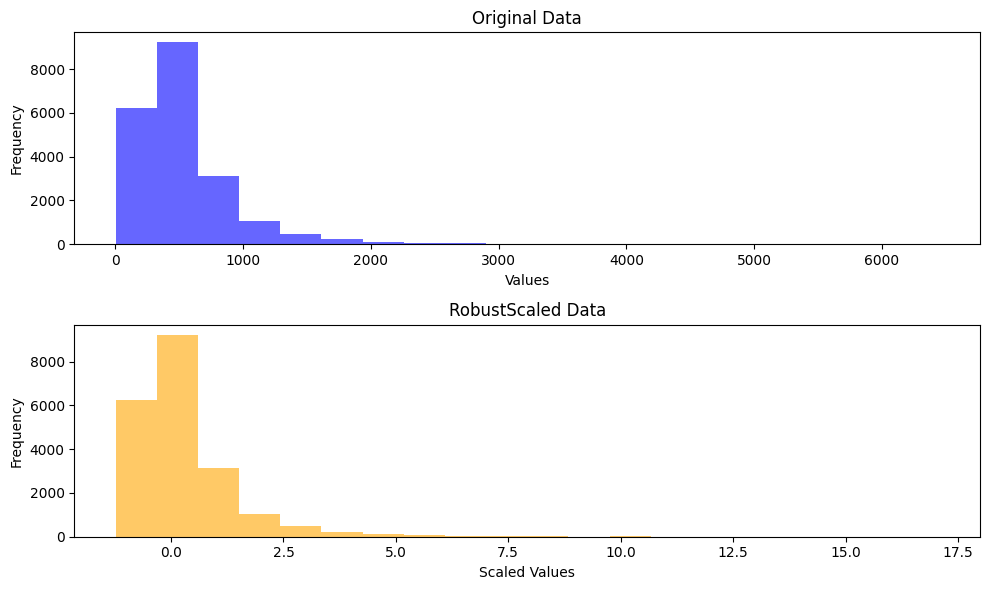

In [329]:
from sklearn.preprocessing import RobustScaler

data = housing_df_engineered_features[['Total_bedrooms']].values

scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)

plt.clf()
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(housing_df_engineered_features['Total_bedrooms'], 
         bins=20, color='blue', alpha=0.6)
plt.title("Original Data")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(data_scaled, bins=20, 
         color='orange', alpha=0.6)
plt.title("RobustScaled Data")
plt.xlabel("Scaled Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
